In [1]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from glob import glob

In [2]:
log_dir = 'logs/'
log_file_names = glob(log_dir + '*history.csv')
log_files = [(pd.read_csv(log_file), log_file.split('_')[0]) for log_file in log_file_names]

In [3]:
log_file_names

['logs/AlexNet_history.csv',
 'logs/GoogLeNet_history.csv',
 'logs/VGG16_history.csv',
 'logs/ResNet50_history.csv',
 'logs/ConvNext_history.csv',
 'logs/MobileNetV1_history.csv',
 'logs/ResNet34_history.csv',
 'logs/MobileNetV2_history.csv',
 'logs/LeNet5_history.csv',
 'logs/DenseNet_history.csv',
 'logs/ResNeXt_history.csv',
 'logs/Xception_history.csv']

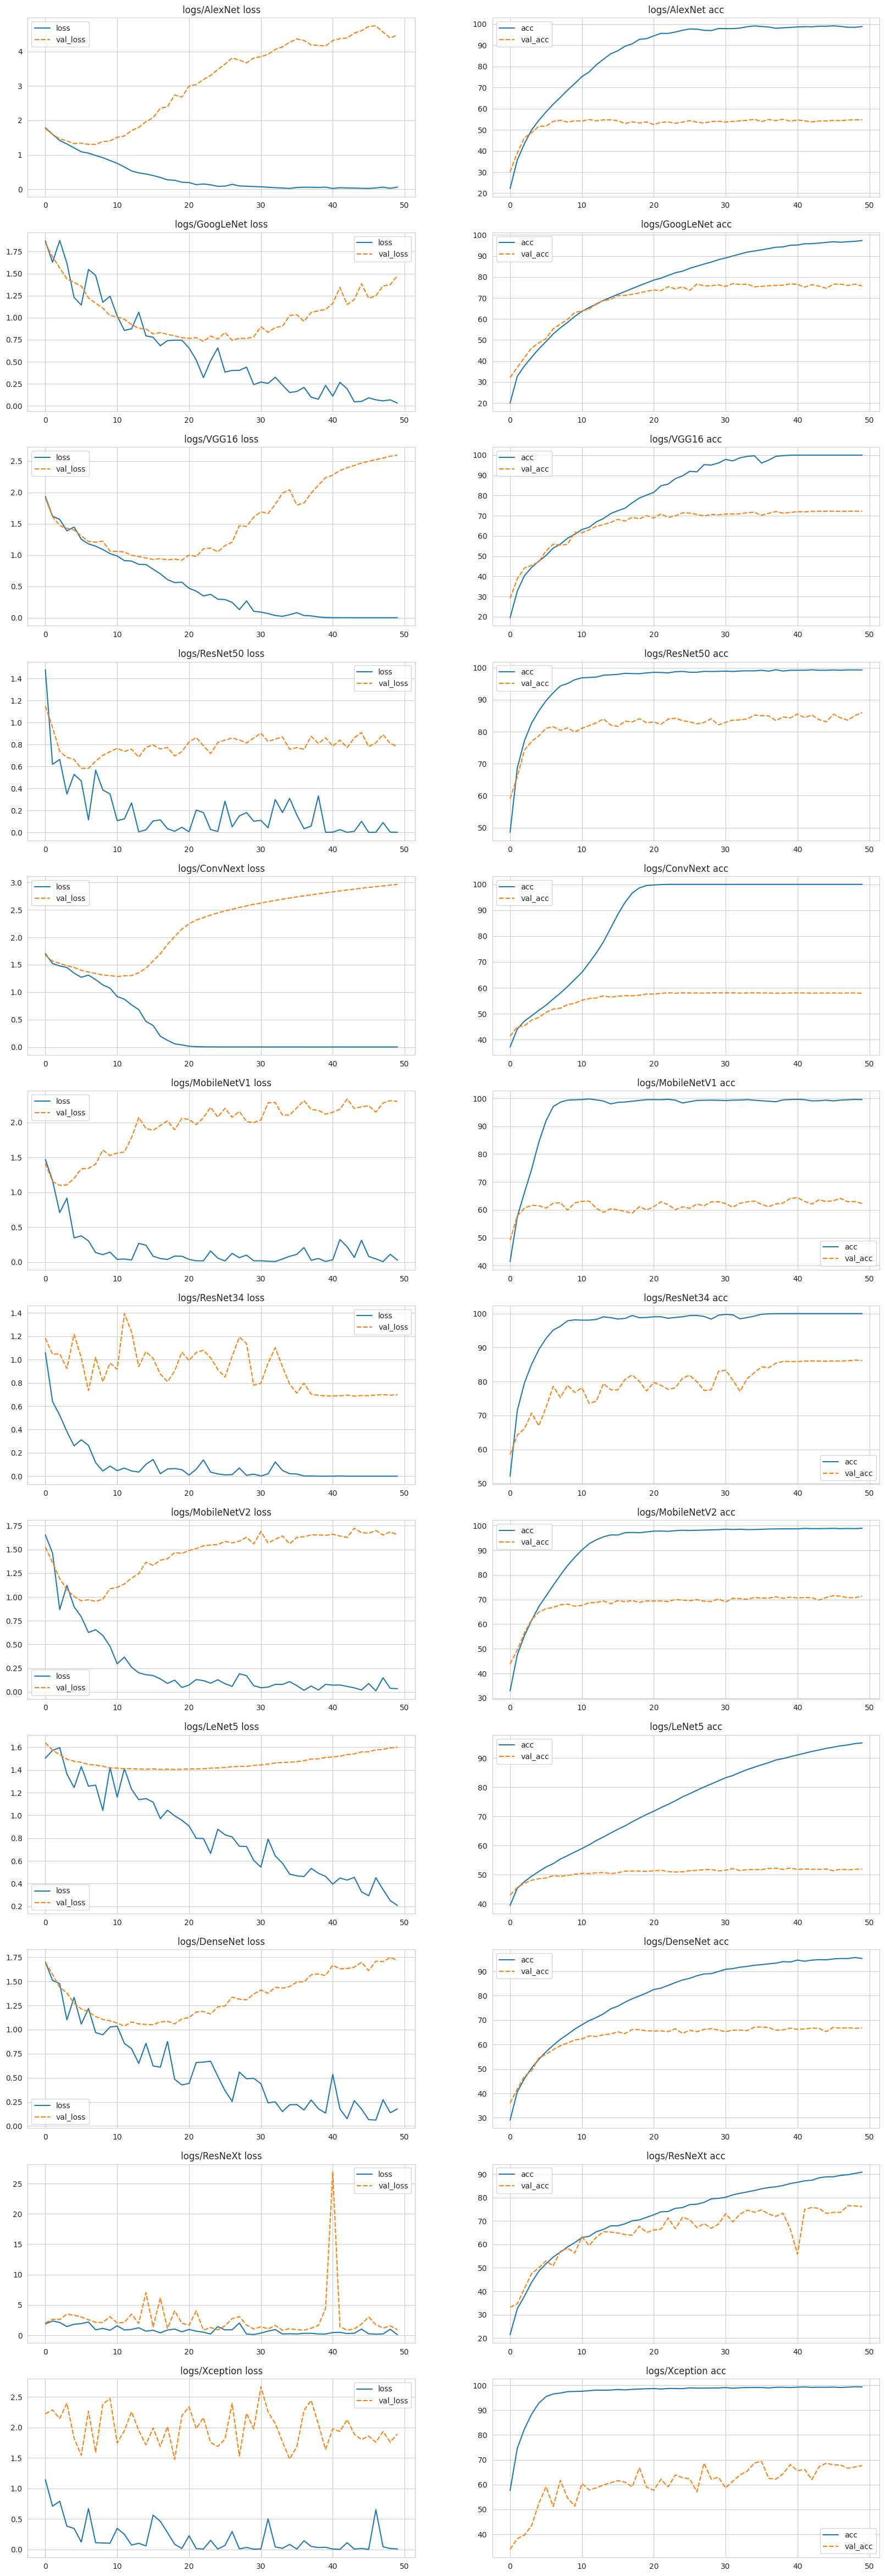

In [4]:
n_cols = 2
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(log_files), ncols=n_cols)
for (i, (log_file, log_name)) in enumerate(log_files):
    ax[i][0].set_title(log_name + ' loss')
    ax[i][1].set_title(log_name + ' acc')
    sns.lineplot([log_file['loss'], log_file['val_loss']], ax=ax[i][0])
    sns.lineplot([log_file['acc'], log_file['val_acc']], ax=ax[i][1])

Example of underfitting and then overfitting ^

# Batch size influence

In [5]:
log_file_b32 = pd.read_csv('logs/ResNet50_history_batch_reduced.csv')
log_file_b64 = pd.read_csv('logs/ResNet50_history.csv')

log_file_b32.rename(columns={column_name: column_name + '_b32' for column_name in log_file_b32.columns}, inplace=True)
log_file_b64.rename(columns={column_name: column_name + '_b64' for column_name in log_file_b64.columns}, inplace=True)

<Axes: >

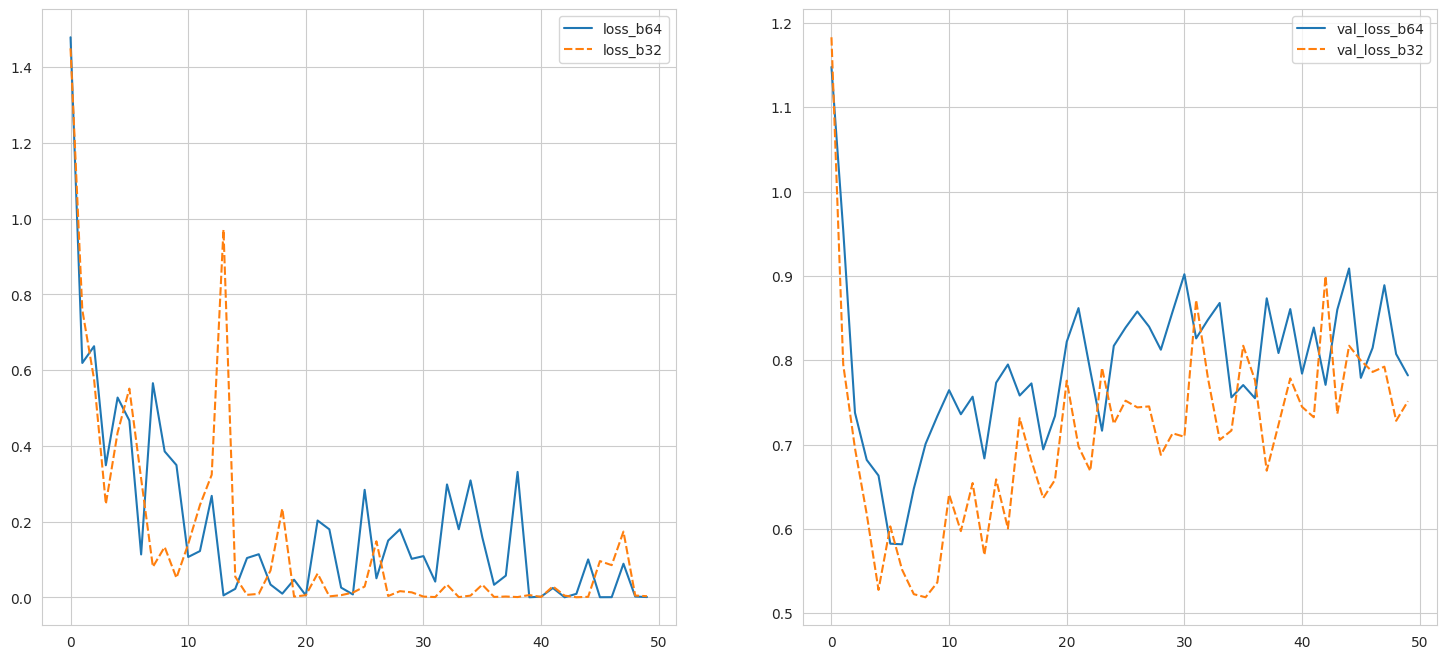

In [6]:
fig, ax = plt.subplots(figsize=(18, 8), nrows=1, ncols=2)
sns.lineplot([log_file_b64['loss_b64'], log_file_b32['loss_b32']], ax=ax[0], legend=True)
sns.lineplot([log_file_b64['val_loss_b64'], log_file_b32['val_loss_b32']], ax=ax[1])

# Early stopping, LR reduce and batch size reduction

In [7]:
log_file_names = glob(log_dir + '*early_stop.csv')
log_files = [(pd.read_csv(log_file), log_file.split('_')[0]) for log_file in log_file_names]
log_file_names

['logs/MobileNetV1_history_early_stop.csv',
 'logs/GoogLeNet_history_early_stop.csv',
 'logs/VGG16_history_early_stop.csv',
 'logs/Xception_history_early_stop.csv',
 'logs/ResNet50_history_early_stop.csv',
 'logs/ConvNext_history_early_stop.csv',
 'logs/DenseNet_history_early_stop.csv',
 'logs/ResNeXt_history_early_stop.csv',
 'logs/ResNet34_history_early_stop.csv',
 'logs/MobileNetV2_history_early_stop.csv',
 'logs/LeNet5_history_early_stop.csv',
 'logs/AlexNet_history_early_stop.csv']

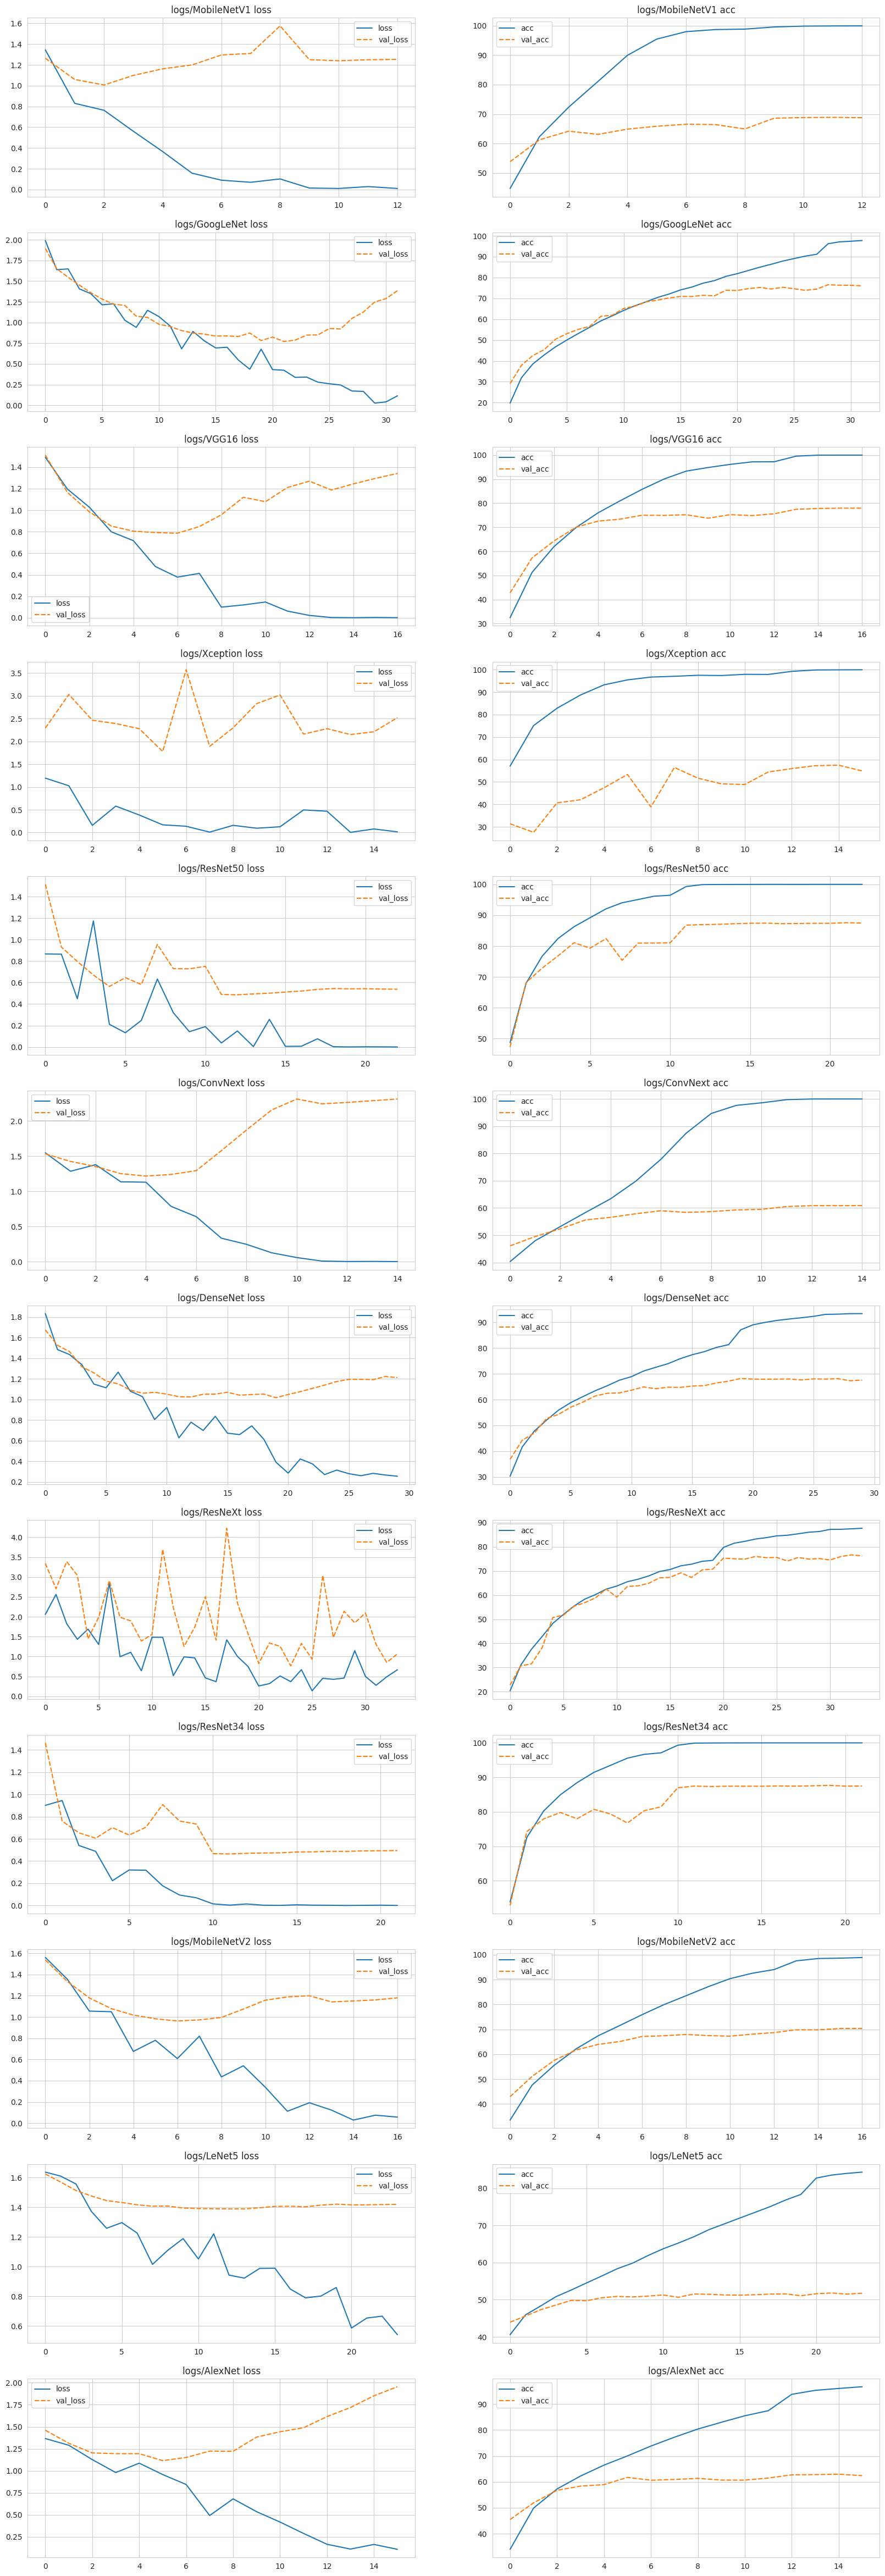

In [8]:
n_cols = 2
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(log_files), ncols=n_cols)
for (i, (log_file, log_name)) in enumerate(log_files):
    ax[i][0].set_title(log_name + ' loss')
    ax[i][1].set_title(log_name + ' acc')
    sns.lineplot([log_file['loss'], log_file['val_loss']], ax=ax[i][0])
    sns.lineplot([log_file['acc'], log_file['val_acc']], ax=ax[i][1])

# SGD optimizer

In [10]:
log_file_names = glob(log_dir + '*sgd.csv')
log_files = [(pd.read_csv(log_file), log_file.split('_')[0]) for log_file in log_file_names]
log_file_names

['logs/MobileNetV1_history_early_stop_sgd.csv',
 'logs/VGG16_history_early_stop_sgd.csv',
 'logs/LeNet5_history_early_stop_sgd.csv',
 'logs/ResNeXt_history_early_stop_sgd.csv',
 'logs/AlexNet_history_early_stop_sgd.csv',
 'logs/DenseNet_history_early_stop_sgd.csv',
 'logs/ResNet50_history_early_stop_sgd.csv',
 'logs/GoogLeNet_history_early_stop_sgd.csv',
 'logs/Xception_history_early_stop_sgd.csv',
 'logs/ResNet34_history_early_stop_sgd.csv',
 'logs/ConvNext_history_early_stop_sgd.csv',
 'logs/MobileNetV2_history_early_stop_sgd.csv']

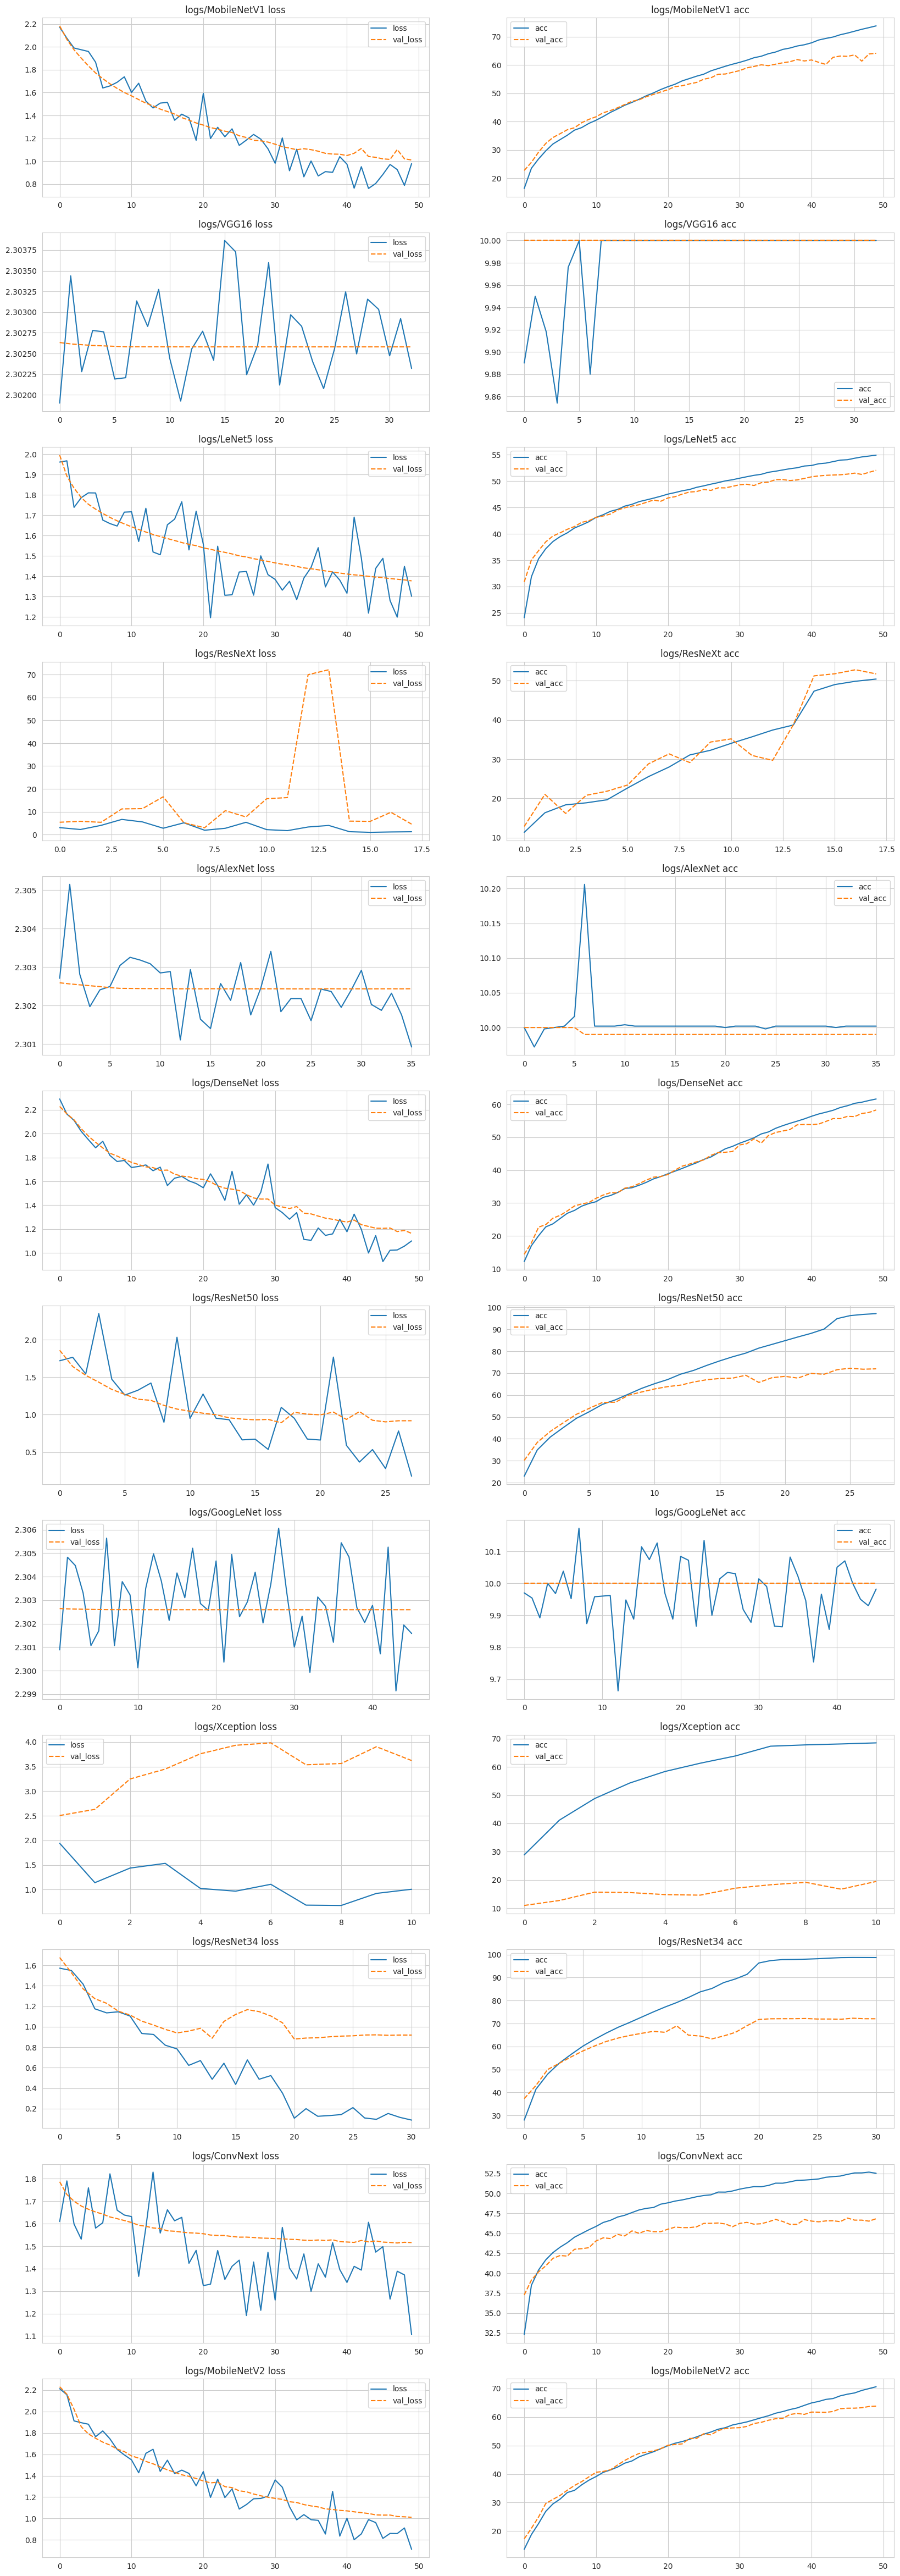

In [11]:
n_cols = 2
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(log_files), ncols=n_cols)
for (i, (log_file, log_name)) in enumerate(log_files):
    ax[i][0].set_title(log_name + ' loss')
    ax[i][1].set_title(log_name + ' acc')
    sns.lineplot([log_file['loss'], log_file['val_loss']], ax=ax[i][0])
    sns.lineplot([log_file['acc'], log_file['val_acc']], ax=ax[i][1])

# All together plots

In [3]:
alexnet_files = glob(log_dir + 'AlexNet*.csv')
alexnet_files

['logs/AlexNet_history.csv',
 'logs/AlexNet_history_early_stop_sgd_no_momentum.csv',
 'logs/AlexNet_history_early_stop_sgd.csv',
 'logs/AlexNet_history_early_stop_sgd_momentum_wd.csv',
 'logs/AlexNet_history_early_stop.csv']

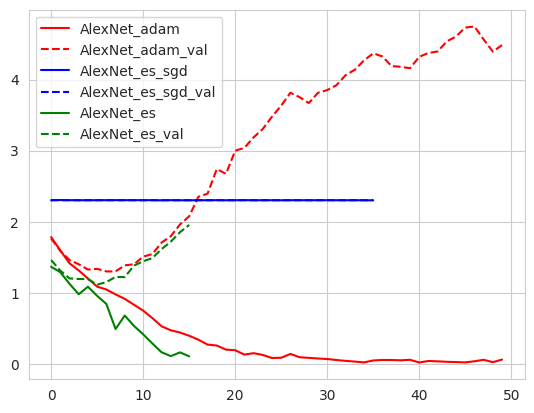

In [18]:
colors = ['r', 'b', 'g']
labels = ['AlexNet_adam', 'AlexNet_es_sgd', 'AlexNet_es']
alexnet_df = [pd.read_csv(file_name) for file_name in alexnet_files]
for i, df in enumerate(alexnet_df):
    plt.plot(df['loss'], color=colors[i], label=labels[i])
    plt.plot(df['val_loss'], color=colors[i], label=labels[i] + '_val', linestyle='--')
plt.legend()
plt.show()

In [6]:
es_sgd_momentum_logs = glob(log_dir + '*sgd.csv')
es_sgd_no_momentum_logs = glob(log_dir + '*momentum.csv')
es_logs = glob(log_dir + '*stop.csv')
wd_logs = glob(log_dir + '*wd.csv')
nn_log_files = list(zip(sorted(es_sgd_momentum_logs), sorted(es_sgd_no_momentum_logs), sorted(es_logs), sorted(wd_logs)))

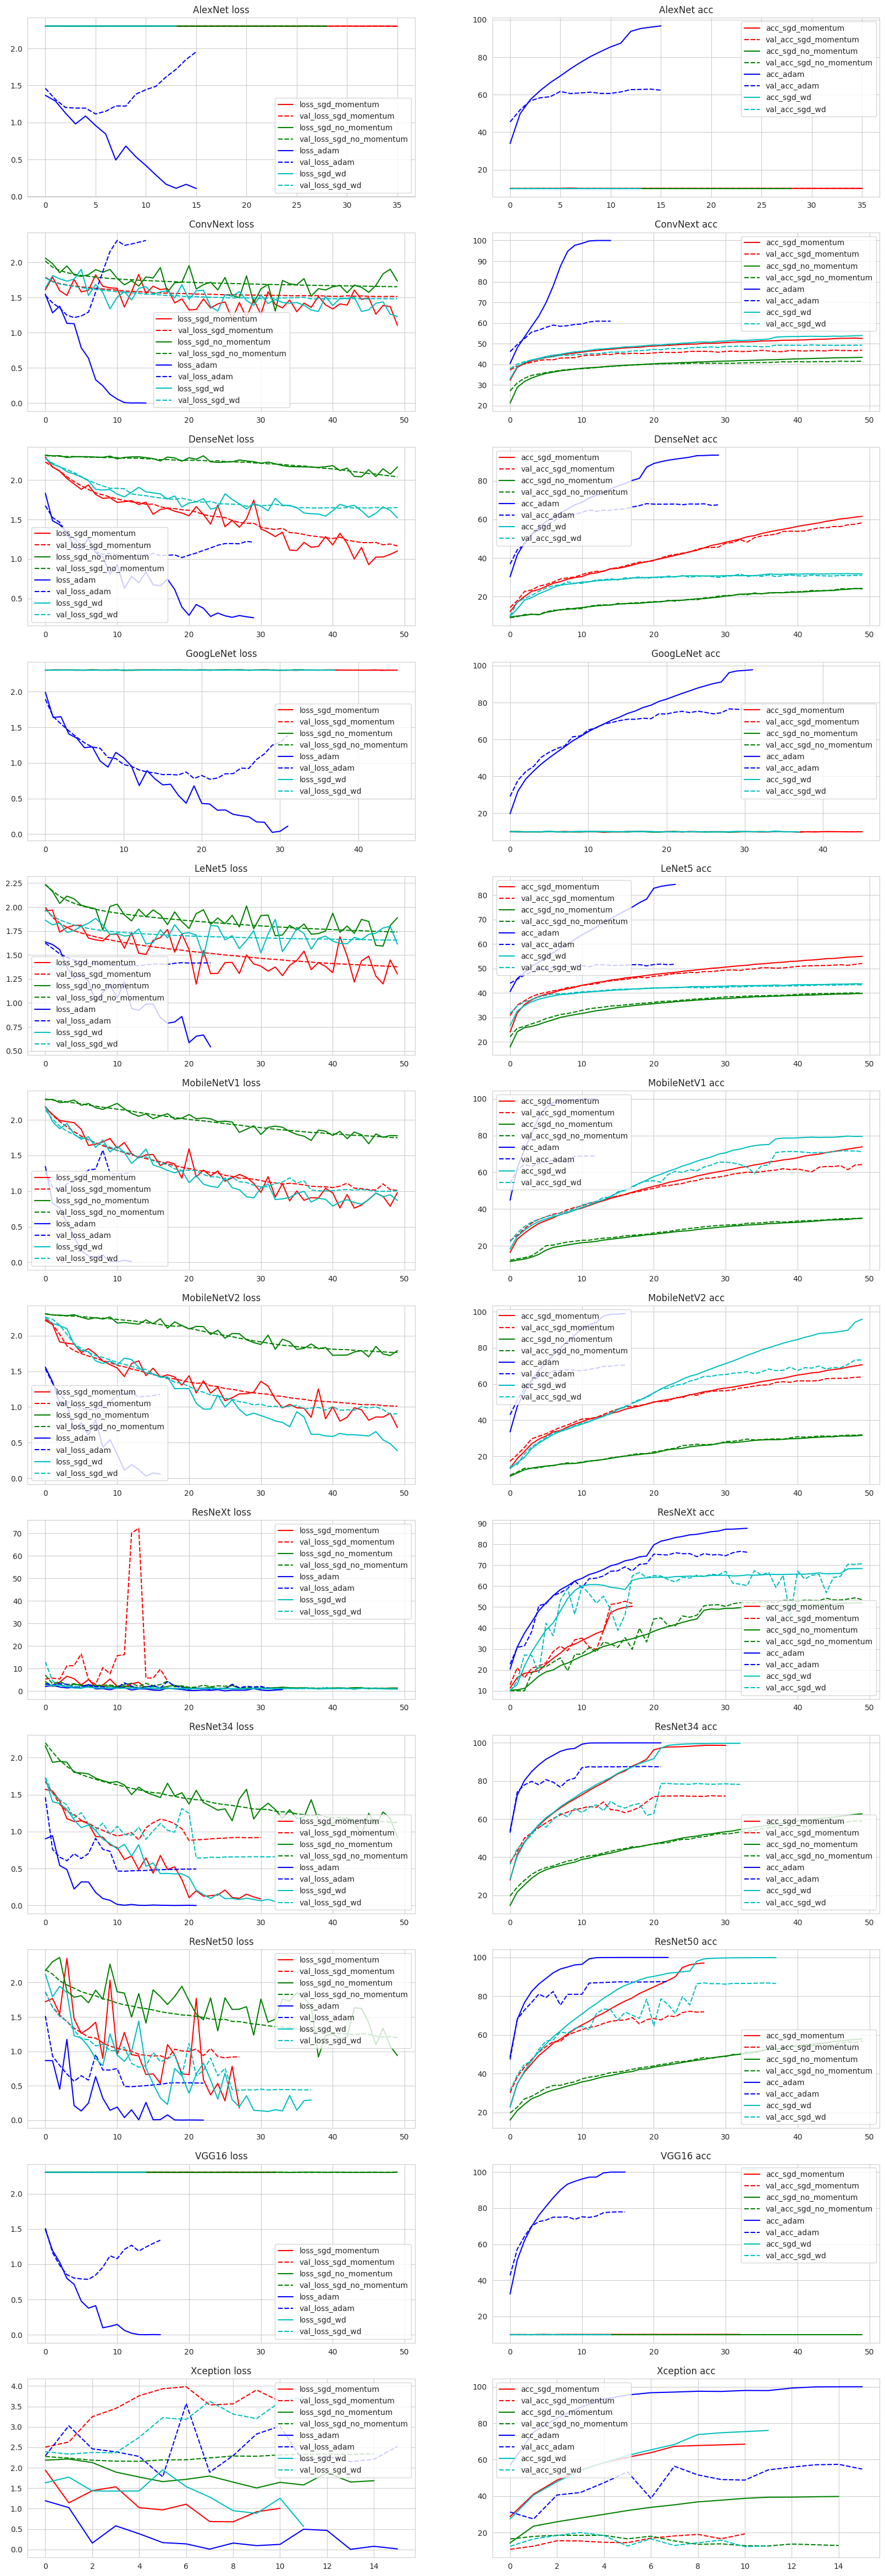

In [7]:
colors = ['r', 'b', 'g']
postfix_labels = ['_es_sgd', '_es_adam']
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(nn_log_files), ncols=2)
for (i, (log_file_sgd_momentum, log_file_sgd_no_momentum, log_file_adam, log_file_wd)) in enumerate(nn_log_files):
    df_sgd_momentum = pd.read_csv(log_file_sgd_momentum).add_suffix('_sgd_momentum')
    df_sgd_no_momentum = pd.read_csv(log_file_sgd_no_momentum).add_suffix('_sgd_no_momentum')
    df_adam = pd.read_csv(log_file_adam).add_suffix('_adam')
    df_sgd_wd = pd.read_csv(log_file_wd).add_suffix('_sgd_wd')
    nn_name = log_file_adam.split('/')[1].split('_')[0]
    ax[i][0].set_title(nn_name + ' loss')
    ax[i][1].set_title(nn_name + ' acc')
    sns.lineplot([df_sgd_momentum['loss_sgd_momentum'], df_sgd_momentum['val_loss_sgd_momentum']], palette=['r', 'r'], ax=ax[i][0])
    sns.lineplot([df_sgd_no_momentum['loss_sgd_no_momentum'], df_sgd_no_momentum['val_loss_sgd_no_momentum']], palette=['g', 'g'], ax=ax[i][0])
    sns.lineplot([df_adam['loss_adam'], df_adam['val_loss_adam']], palette=['b', 'b'], ax=ax[i][0])
    sns.lineplot([df_sgd_wd['loss_sgd_wd'], df_sgd_wd['val_loss_sgd_wd']], palette=['c', 'c'], ax=ax[i][0])
    sns.lineplot([df_sgd_momentum['acc_sgd_momentum'], df_sgd_momentum['val_acc_sgd_momentum']], palette=['r', 'r'], ax=ax[i][1])
    sns.lineplot([df_sgd_no_momentum['acc_sgd_no_momentum'], df_sgd_no_momentum['val_acc_sgd_no_momentum']], palette=['g', 'g'], ax=ax[i][1])
    sns.lineplot([df_adam['acc_adam'], df_adam['val_acc_adam']], palette=['b', 'b'], ax=ax[i][1])
    sns.lineplot([df_sgd_wd['acc_sgd_wd'], df_sgd_wd['val_acc_sgd_wd']], palette=['c', 'c'], ax=ax[i][1])